In [79]:
# Import numpy library for numerical computations
import numpy as np

# Import pandas library for data manipulation and analysis (working with DataFrames, Series)
import pandas as pd

# Import libraries for data visualization
#  - matplotlib.pyplot for basic plotting needs
#  - matplotlib.colors for colormap creation
import matplotlib.pyplot as plt
from matplotlib import colors

# Import seaborn library for creating statistical graphics (built on top of matplotlib)
import seaborn as sns

# Import plotly express library for interactive visualizations (plotly.express)
import plotly.express as px

# Import plotly.io for interacting with plotly figures
import plotly.io as pio

In [80]:
# Configure pandas to display all columns in DataFrames (avoid truncation)
pd.set_option('display.max_columns', None)

# Set plotly template to 'ggplot2' for a specific visual style
pio.templates.default = "ggplot2"

# Configure seaborn plot aesthetics:
#  - Figure size: 15 inches wide by 8 inches high
#  - Font scale: 1.2 times larger
#  - Axes face color: "#FFF9ED" (light background)
#  - Figure face color: "#FFF9ED" (consistent background)
sns.set(rc={"figure.figsize": [15, 8]}, font_scale=1.2)
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

# Define a color palette for visualizations
palette = ["#007B7F", "#A2D5C6", "#FF6B6B", "#B392AC", "#00203F", "#FFD166"]

# Set the default color palette for seaborn plots using the defined palette
sns.set_palette(palette)

# Create a ListedColormap object from the color palette for further customization
color_map = colors.ListedColormap(palette)

In [81]:
# Read the CSV data into a pandas DataFrame
df = pd.read_csv(r"Dataset Heart Disease.csv")

# Get a quick glimpse of the first few rows of data
print(df.head())

   Unnamed: 0  age  sex  chest pain type  resting bps  cholesterol  \
0           0   40    1                2          140        289.0   
1           1   49    0                3          160        180.0   
2           2   37    1                2          130        283.0   
3           3   48    0                4          138        214.0   
4           4   54    1                3          150        195.0   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  oldpeak  \
0                    0            0             172                0      0.0   
1                    0            0             156                0      1.0   
2                    0            1              98                0      0.0   
3                    0            0             108                1      1.5   
4                    0            0             122                0      0.0   

   ST slope  target  
0         1       0  
1         2       1  
2         1       0  
3   

In [82]:
# Check the DataFrame dimensions (number of rows and columns)
print(df.shape)

(1048, 13)


## There are 1048 samples and 13 columns


In [83]:
# List column names
print(df.columns)

Index(['Unnamed: 0', 'age', 'sex', 'chest pain type', 'resting bps',
       'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


df.colu


In [84]:
# Drop the unnecessary column (assuming 'Unnamed: 0' doesn't hold useful data)
df = df.drop(columns='Unnamed: 0')

In [85]:
# Check data types of each column to identify numerical and categorical features
print(df.dtypes)

age                      int64
sex                      int64
chest pain type          int64
resting bps              int64
cholesterol            float64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


## All columns are numerical and none of them are categorical


In [86]:
# Get detailed information about the DataFrame, including data types and non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB
None


In [87]:
# Check for missing values in the data
print(df.isna().sum())

age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


## There are no missing values


In [88]:
# Check for duplicate data entries
print(df.duplicated().any())

False


## There are no duplicates


In [89]:
# Summarize the data using descriptive statistics
print(df.describe())

               age          sex  chest pain type  resting bps  cholesterol  \
count  1048.000000  1048.000000      1048.000000  1048.000000  1048.000000   
mean     53.325382     0.734733         2.817748   132.613550   245.172710   
std       9.397822     0.441686         1.118649    17.367605    57.101359   
min      28.000000     0.000000         1.000000    92.000000    85.000000   
25%      46.000000     0.000000         2.000000   120.000000   208.000000   
50%      54.000000     1.000000         3.000000   130.000000   239.000000   
75%      60.000000     1.000000         4.000000   140.000000   275.000000   
max      77.000000     1.000000         4.000000   200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1048.000000  1048.000000     1048.000000      1048.000000   
mean              0.162214     0.606870      142.918893         0.368321   
std               0.368823     0.763313       24.427115         0.482

Based on the provided summary statistics, here are some insights:

1. **Age Distribution**:

   - The average age of individuals in the dataset is approximately 53.33 years, with a standard deviation of 9.40 years.
   - The age range spans from 28 to 77 years.

2. **Sex Distribution**:

   - The dataset consists mostly of males, with a mean sex value of approximately 0.73.
   - This indicates that males are slightly overrepresented compared to females in the dataset.

3. **Heart Health Indicators**:

   - The average resting blood pressure is approximately 132.61 mmHg, with a standard deviation of 17.37 mmHg.
   - The average cholesterol level is approximately 245.17 mg/dL, with a standard deviation of 57.10 mg/dL.
   - Most individuals have fasting blood sugar levels below 120 mg/dL, as indicated by the mean value of approximately 0.16.
   - The mean maximum heart rate achieved during exercise is approximately 142.92 bpm, with a standard deviation of 24.43 bpm.
   - The average ST depression induced by exercise relative to rest (oldpeak) is approximately 0.94, with a standard deviation of 1.10.

4. **Disease Indicators**:

   - The majority of individuals in the dataset do not experience exercise-induced angina, as indicated by the mean value of approximately 0.37.
   - The target variable indicates that around half of the individuals have heart disease (target = 1), while the other half do not (target = 0).

5. **Chest Pain Type**:

   - The dataset contains various types of chest pain, with an average chest pain type value of approximately 2.82.
   - The chest pain types range from 1 to 4, indicating different levels or types of discomfort reported by individuals.

6. **ECG Results**:

   - The average resting electrocardiographic result is approximately 0.61, with a standard deviation of 0.76.
   - The resting ECG values range from 0 to 2, representing different electrocardiographic abnormalities.

7. **Exercise Performance**:

   - The mean ST slope is approximately 1.53, with a standard deviation of 0.61.
   - The ST slope values range from 0 to 3, indicating various degrees of ST segment deviation during exercise relative to rest.

8. **Fasting Blood Sugar**:

   - The majority of individuals (75%) have a fasting blood sugar level below 0 mg/dL (likely due to a binary encoding of the data, where 0 indicates normal and 1 indicates abnormal).
   - It's important to investigate how the data is encoded for this feature to accurately interpret the results.

9. **Resting ECG**:

   - The average resting ECG value is approximately 0.61, with a standard deviation of 0.76. Examining the encoding scheme for this feature would be helpful to understand what these values  
     represent (e.g., normal, abnormal types).

10. **Exercise Performance**:

   - The maximum heart rate during exercise shows a wider range compared to resting blood pressure, with values reaching up to 202 bpm. This suggests potential variability in exercise intensity 
     or fitness levels among individuals.

   - The distribution of the ST slope indicates a bias towards higher values (average 1.53). Investigating the meaning of different ST slope values (e.g., upsloping, flat, downsloping) can 
     provide insights into the prevalence of specific exercise ECG patterns.

11. **Target Variable (Heart Disease)**:

   - The dataset appears to be balanced regarding the target variable, with roughly half of the individuals diagnosed with heart disease (target = 1) and the other half without (target = 0). This 
     is beneficial for training machine learning models that require balanced class distributions.


In [90]:
# Calculate the number of unique values in each column
print(df.nunique())

age                     49
sex                      2
chest pain type          4
resting bps             63
cholesterol            221
fasting blood sugar      2
resting ecg              3
max heart rate         109
exercise angina          2
oldpeak                 43
ST slope                 4
target                   2
dtype: int64


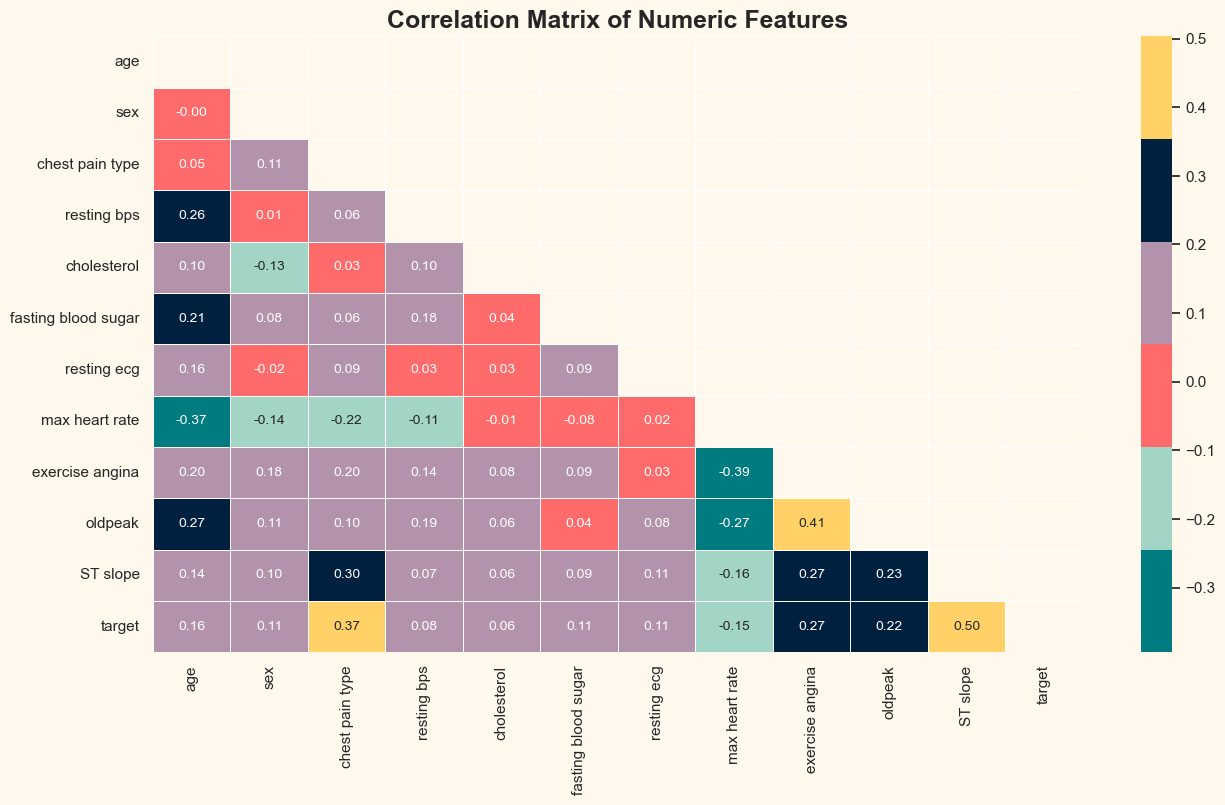

In [91]:
# Create a correlation matrix to visualize relationships between numerical features
correlation_matrix = df.corr()

# Create a mask to hide redundant upper triangular part of the heatmap
mask = np.triu(np.ones_like(df.corr()))

# Generate a heatmap using seaborn to visualize correlations
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap=color_map, fmt=".2f",
            annot_kws={'size': 10}, linewidths=0.5, cbar=True)

plt.title("Correlation Matrix of Numeric Features", fontsize=18, weight="bold")

plt.show()

In [92]:
# Create a copy of the DataFrame for feature selection (avoid modifying the original data)
data = df.copy()

In [93]:

# Get a list of column names
df_cols = df.columns.tolist()

In [94]:
# Separate features (X) from the target variable (y)
X_selected = data.drop(['target'], axis=1)
y_selected = data['target']

In [95]:
# Use SelectKBest to select the top 10 most informative features for heart disease prediction based on f_classif scores
from sklearn.feature_selection import SelectKBest, f_classif
best_feat = SelectKBest(score_func=f_classif, k=10)

fit_best = best_feat.fit(X_selected, y_selected)

# Create DataFrames to store feature scores and names
df_scores = pd.DataFrame(fit_best.scores_)
df_columns = pd.DataFrame(X_selected.columns)

# Combine feature scores and names into a single DataFrame
features_score = pd.concat([df_columns, df_scores], axis=1)
features_score.columns = ['Feature', 'Score']

# Sort features by score in descending order
features_score.sort_values(by=['Score'], inplace=True, ascending=False)

# Apply background color gradient based on feature score using seaborn
features_score.style.background_gradient(cmap=color_map)

,Feature,Score
10,ST slope,355.244365
2,chest pain type,162.385189
8,exercise angina,82.855358
9,oldpeak,51.780394
0,age,26.790160
7,max heart rate,22.782126
1,sex,13.319282
6,resting ecg,13.079904
5,fasting blood sugar,12.090848
3,resting bps,6.393105


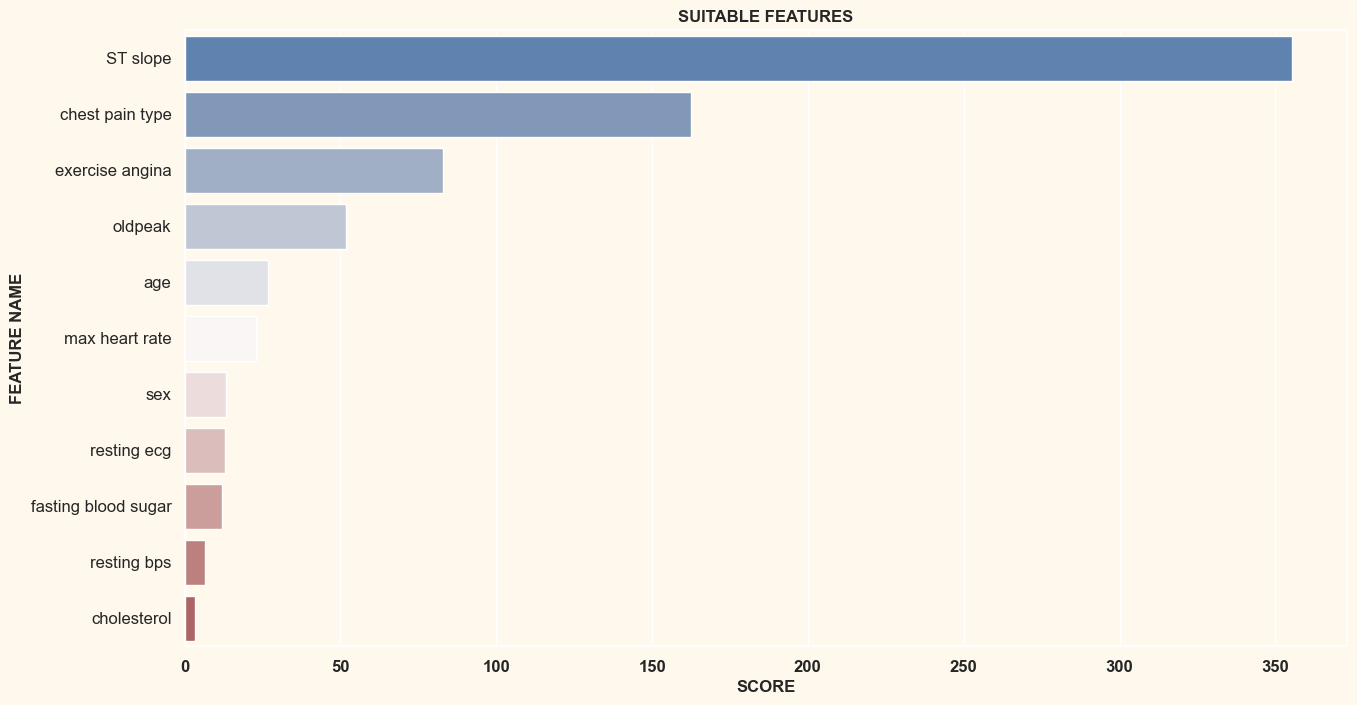

In [96]:
# Generate a bar chart to visualize feature importance
sns.barplot(data=features_score, x='Score', y='Feature', palette="vlag")
plt.title('SUITABLE FEATURES', weight='bold')
plt.xlabel('SCORE', weight='bold')
plt.ylabel('FEATURE NAME', weight='bold')
plt.xticks(fontsize=12, weight="bold")
plt.yticks(fontsize=12)
plt.show()

In [97]:
# Perform feature selection using the selected features
fit_best = best_feat.fit_transform(X_selected, y_selected)
df_selected = df[list(best_feat.get_feature_names_out())]

In [98]:
df_selected.columns

Index(['age', 'sex', 'chest pain type', 'resting bps', 'fasting blood sugar',
       'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak',
       'ST slope'],
      dtype='object')

In [99]:
# Separate the selected features (X) from the target variable (y) again for clarity
X = df_selected
y = df['target']

In [100]:
# Split data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

# Import necessary model classes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
# Split data using train_test_split, ensuring class balance with 'stratify'
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=42, stratify=y)

print('X Train Shape is ==> ', X_train.shape)
print('y Train Shape is ==> ', y_train.shape)

print('='*30)
print('='*30)

print('X Test Shape is ==> ', X_test.shape)
print('y Test Shape is ==> ', y_test.shape)

X Train Shape is ==>  (786, 10)
y Train Shape is ==>  (786,)
X Test Shape is ==>  (262, 10)
y Test Shape is ==>  (262,)


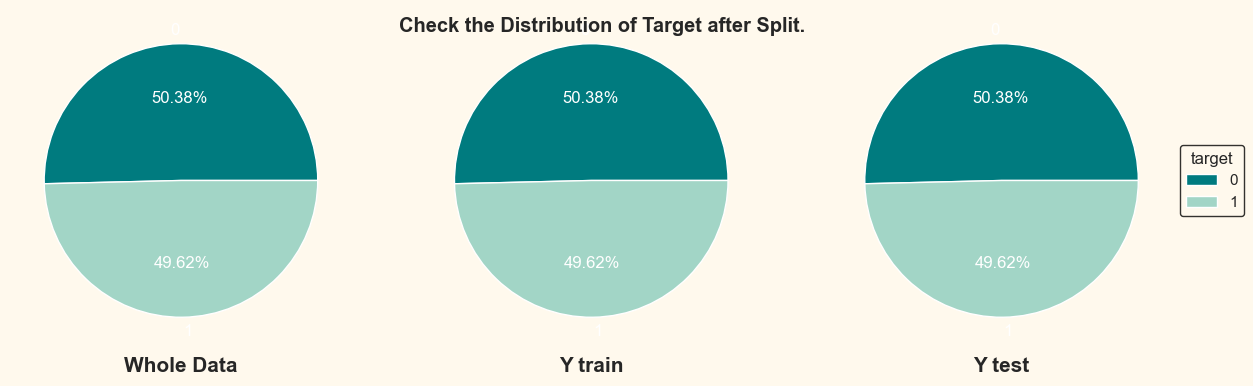

In [102]:
# Check the distribution of the target variable in training, testing, and entire data
check_target = [y, y_train, y_test]
label_name = ["Whole Data", "Y train", "Y test"]

plt.suptitle("Check the Distribution of Target after Split.",
             weight='bold', x=0.52, y=0.7)

for idx, target_name in enumerate(check_target):
    label = label_name[idx]
    plt.subplot(1, 3, idx+1)
    plt.pie(x=target_name.value_counts().values, labels=target_name.value_counts().index, autopct="%.2f%%",
            textprops=dict(size=12, color="white"))
    plt.xlabel(label, fontsize=15, weight="bold")

plt.legend(labels=target_name.value_counts().index, title="target",
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="black")
plt.show()

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Apply standard scaling to numerical features (assuming all features in df_selected are numerical)
scaler = StandardScaler()
pipeline_final = Pipeline(
    steps=[
        ("scaler", scaler)
    ]
)

X_train_final = pipeline_final.fit_transform(X_train)
X_test_final = pipeline_final.transform(X_test)

## Modelling


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



# Define a function to evaluate model performance metrics (F1-score, accuracy, R-squared)
def model_performance(model_name, model, X_train_data, X_test_data, y_train_data, y_test_data):
    y_train_predicted = model.predict(X_train_data)
    y_test_predicted = model.predict(X_test_data)

    print(f"==> Model and some Details: {model_name}")
    print("**" * 30)

    f1_score_training = round(
        f1_score(y_train_data, y_train_predicted, average='weighted'), 3) * 100
    f1_score_testing = round(
        f1_score(y_test_data, y_test_predicted, average='weighted'), 3) * 100

    print(
        f"F1-score for training data using {model_name} : {f1_score_training} %")
    print(
        f"F1-score for testing data using {model_name} : {f1_score_testing} %")

    print("**" * 30)

    acc_score_training = round(accuracy_score(
        y_train_data, y_train_predicted), 3) * 100
    acc_score_testing = round(accuracy_score(
        y_test_data, y_test_predicted), 3) * 100
    print(
        f"Accuracy Score for training data using {model_name} : {acc_score_training} %")
    print(
        f"Accuracy Score for testing data using {model_name} : {acc_score_testing} %")

    print("**" * 30)

    precision_training = round(precision_score(
        y_train_data, y_train_predicted, average='weighted'), 3) * 100
    precision_testing = round(precision_score(
        y_test_data, y_test_predicted, average='weighted'), 3) * 100
    print(
        f"Precision for training data using {model_name} : {precision_training} %")
    print(
        f"Precision for testing data using {model_name} : {precision_testing} %")

    print("**" * 30)

    recall_training = round(recall_score(
        y_train_data, y_train_predicted, average='weighted'), 3) * 100
    recall_testing = round(recall_score(
        y_test_data, y_test_predicted, average='weighted'), 3) * 100
    print(f"Recall for training data using {model_name} : {recall_training} %")
    print(f"Recall for testing data using {model_name} : {recall_testing} %")

In [105]:
from sklearn.metrics import f1_score, make_scorer, confusion_matrix

In [106]:
def conf_matrix(model, title=""):

    y_predict = model.predict(X_test_final)

    confusionMatrix = confusion_matrix(y_test, y_predict)

    plt.figure(figsize=(9, 7))
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cbar=False)

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{title}")

    plt.show()

## Logistic Regression


In [107]:
# Create and evaluate different machine learning models
# 1. Logistic Regression
model_logistic = LogisticRegression(
    random_state=42, solver='lbfgs', max_iter=1000)
model_logistic.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [108]:
model_performance(
    model_name="Logistic Regression",
    model=model_logistic,
    X_train_data=X_train_final,
    X_test_data=X_test_final,
    y_train_data=y_train,
    y_test_data=y_test
)

==> Model and some Details: Logistic Regression
************************************************************
F1-score for training data using Logistic Regression : 78.10000000000001 %
F1-score for testing data using Logistic Regression : 78.60000000000001 %
************************************************************
Accuracy Score for training data using Logistic Regression : 78.10000000000001 %
Accuracy Score for testing data using Logistic Regression : 78.60000000000001 %
************************************************************
Precision for training data using Logistic Regression : 78.10000000000001 %
Precision for testing data using Logistic Regression : 78.7 %
************************************************************
Recall for training data using Logistic Regression : 78.10000000000001 %
Recall for testing data using Logistic Regression : 78.60000000000001 %


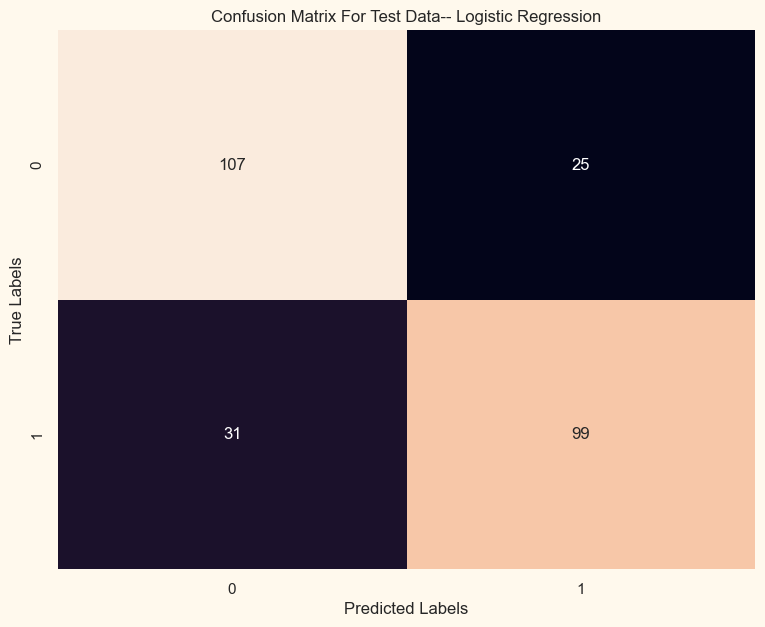

In [109]:
conf_matrix(model=model_logistic,
            title="Confusion Matrix For Test Data-- logistic Regression".title())

## KNN


In [110]:
# Create a KNN classifier with specific parameters:
# - n_neighbors: The number of neighbors to consider (in this case, 5)
# - p: The power parameter for the Minkowski distance (in this case, 4, indicating the Manhattan distance)
# - n_jobs: Number of CPU cores to use for parallel processing (in this case, -1 means to use all available cores)
KNN_clf = KNeighborsClassifier(n_neighbors=5, p=4, n_jobs=-1)

# Train the KNN classifier on the training data
KNN_clf.fit(X_train_final, y_train)

KNeighborsClassifier(n_jobs=-1, p=4)

In [111]:
model_performance(model_name="K-Nearest Neighbors Algorithm",
                  model=KNN_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: K-Nearest Neighbors Algorithm
************************************************************
F1-score for training data using K-Nearest Neighbors Algorithm : 82.69999999999999 %
F1-score for testing data using K-Nearest Neighbors Algorithm : 80.2 %
************************************************************
Accuracy Score for training data using K-Nearest Neighbors Algorithm : 82.69999999999999 %
Accuracy Score for testing data using K-Nearest Neighbors Algorithm : 80.2 %
************************************************************
Precision for training data using K-Nearest Neighbors Algorithm : 82.8 %
Precision for testing data using K-Nearest Neighbors Algorithm : 80.2 %
************************************************************
Recall for training data using K-Nearest Neighbors Algorithm : 82.69999999999999 %
Recall for testing data using K-Nearest Neighbors Algorithm : 80.2 %


C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


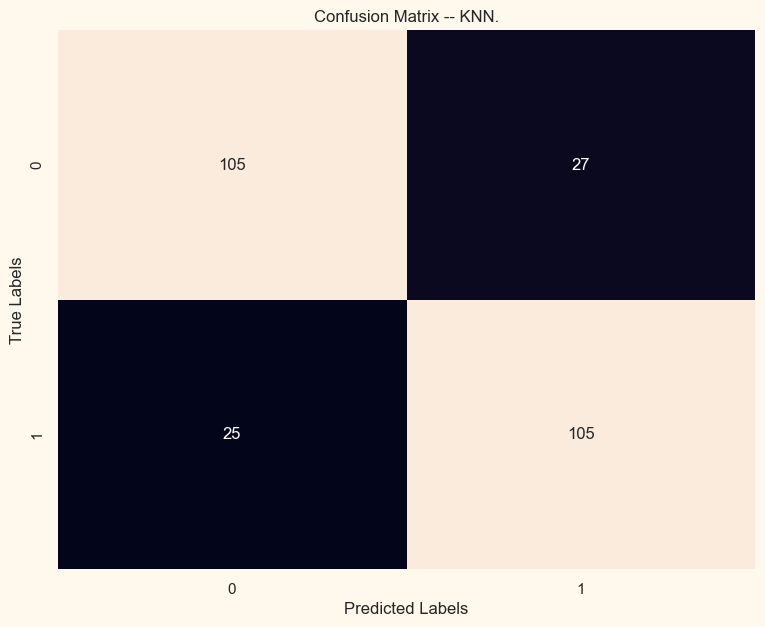

In [112]:
conf_matrix(model=KNN_clf,
            title="Confusion Matrix -- KNN.")

## SVM


In [113]:
# Create an instance of the Support Vector Machine (SVM) classifier with specified parameters:
# - C: The regularization parameter. In this case, C=2.
# - kernel: The kernel function used for classification. Here, we're using a polynomial kernel.
# - degree: The degree of the polynomial kernel. In this case, degree=3.
SVC_clf = SVC(C=2, kernel="poly", degree=3)

# Fit the SVM classifier to the training data
SVC_clf.fit(X_train_final, y_train)

SVC(C=2, kernel='poly')

In [114]:
model_performance(model_name="Support Vector Machine (Ploy Kernal)",
                  model=SVC_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: Support Vector Machine (Ploy Kernal)
************************************************************
F1-score for training data using Support Vector Machine (Ploy Kernal) : 84.39999999999999 %
F1-score for testing data using Support Vector Machine (Ploy Kernal) : 79.80000000000001 %
************************************************************
Accuracy Score for training data using Support Vector Machine (Ploy Kernal) : 84.39999999999999 %
Accuracy Score for testing data using Support Vector Machine (Ploy Kernal) : 79.80000000000001 %
************************************************************
Precision for training data using Support Vector Machine (Ploy Kernal) : 84.39999999999999 %
Precision for testing data using Support Vector Machine (Ploy Kernal) : 79.80000000000001 %
************************************************************
Recall for training data using Support Vector Machine (Ploy Kernal) : 84.39999999999999 %
Recall for testing data using Support 

## Random Forest


In [115]:
# Create a Random Forest classifier with specific parameters:
# - n_estimators: The number of decision trees in the forest (in this case, 200)
# - max_depth: The maximum depth of each decision tree (in this case, 12)
# - random_state: A seed value for random number generation to ensure reproducibility (in this case, 45)
RF_clf = RandomForestClassifier(
    n_estimators=200, max_depth=12, random_state=45)

# Train the Random Forest classifier on the training data
RF_clf.fit(X_train_final, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=45)

In [116]:
model_performance(model_name="Random Forest.",
                  model=RF_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: Random Forest.
************************************************************
F1-score for training data using Random Forest. : 100.0 %
F1-score for testing data using Random Forest. : 80.5 %
************************************************************
Accuracy Score for training data using Random Forest. : 100.0 %
Accuracy Score for testing data using Random Forest. : 80.5 %
************************************************************
Precision for training data using Random Forest. : 100.0 %
Precision for testing data using Random Forest. : 80.60000000000001 %
************************************************************
Recall for training data using Random Forest. : 100.0 %
Recall for testing data using Random Forest. : 80.5 %


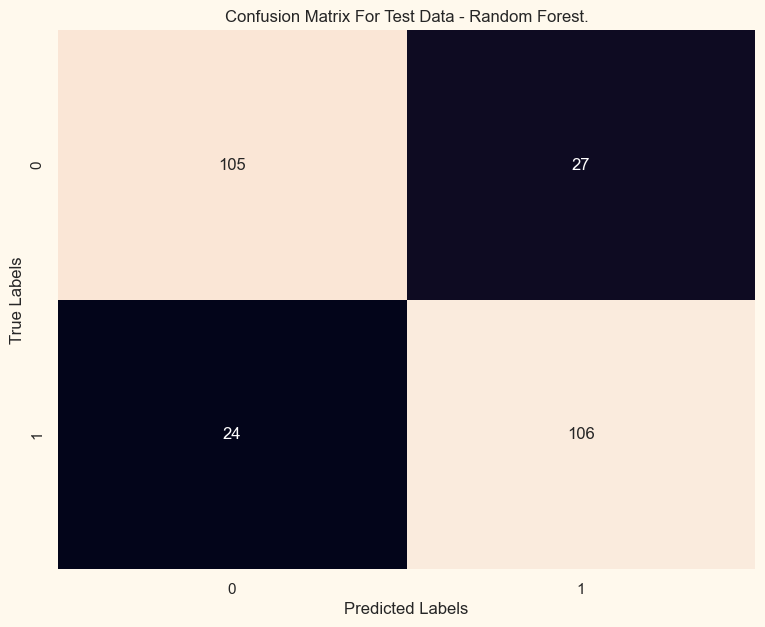

In [117]:
conf_matrix(model=RF_clf,
            title="Confusion Matrix For Test Data - Random Forest.".title())

## Evaluation of Machine Learning Models for Heart Disease Prediction

This analysis evaluates the performance of different machine learning models for predicting heart disease.

### Overall Performance

All models achieved reasonable performance on the training data, with F1-scores ranging from 78.1% (Logistic Regression) to 100% (Random Forest).

**Key Point:** While high training scores are encouraging, generalizability to unseen data is crucial.

### Generalization

The performance on the testing data, which represents unseen data, reveals a different story. F1-scores dropped significantly for:

* Random Forest (down to 80.5%)
* Support Vector Machine (SVM) (down to 79.8%)

**This indicates potential overfitting** in these models, where they memorize the training data too well and fail to generalize to new examples.

### Model Breakdown

* **K-Nearest Neighbors (KNN):** KNN achieved a balanced performance with an F1-score of 80.2% on the testing data. This suggests it captures some underlying patterns in the data and generalizes reasonably well.

* **Logistic Regression:** Logistic Regression also performed decently, with an F1-score of 78.6% on the testing data. However, compared to KNN, it might be slightly less capable of capturing complex relationships within the data.

* **Random Forest (Overfitting):** While Random Forest achieved a perfect F1-score on the training data (100%), its performance dropped significantly on the testing data (80.5%). This is a classic sign of overfitting.

### Conclusion

The K-Nearest Neighbors (KNN) model seems to be the best choice among the evaluated models in this scenario. It demonstrates a reasonable balance between performance on the training data and generalization to unseen data (testing data).

**However, further exploration is recommended:**

* **Alternative Models:** Explore models like XGBoost or Gradient Boosting for potentially better performance.

* **Hyperparameter Tuning:** Fine-tuning hyperparameters of each model could improve performance on both training and testing data.

* **Data Exploration:** Further investigation into the data, including feature engineering and addressing potential imbalances, could enhance model performance.

By exploring these options and considering your project's specific requirements, you can identify the most suitable model for predicting heart disease in this dataset. Remember, the best model choice depends on the specific problem and dataset you're working with.
